In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import os

In [3]:
image_size=[224,224]

In [4]:
train_directory='new_brain_train'
test_directory='new_brain_test'

In [5]:
from glob import glob
folder_length=glob('brain_tumor_dataset_training/*')

In [6]:
len(folder_length)

2

In [11]:
folder_length_no=glob('brain_tumor_dataset_training/yes/*')

In [12]:
len(folder_length_no)

155

In [13]:
folder_length_no

['brain_tumor_dataset_training/yes\\Y1.jpg',
 'brain_tumor_dataset_training/yes\\Y10.jpg',
 'brain_tumor_dataset_training/yes\\Y100.JPG',
 'brain_tumor_dataset_training/yes\\Y101.jpg',
 'brain_tumor_dataset_training/yes\\Y102.jpg',
 'brain_tumor_dataset_training/yes\\Y103.jpg',
 'brain_tumor_dataset_training/yes\\Y104.jpg',
 'brain_tumor_dataset_training/yes\\Y105.jpg',
 'brain_tumor_dataset_training/yes\\Y106.jpg',
 'brain_tumor_dataset_training/yes\\Y107.jpg',
 'brain_tumor_dataset_training/yes\\Y108.jpg',
 'brain_tumor_dataset_training/yes\\Y109.JPG',
 'brain_tumor_dataset_training/yes\\Y11.jpg',
 'brain_tumor_dataset_training/yes\\Y111.JPG',
 'brain_tumor_dataset_training/yes\\Y112.JPG',
 'brain_tumor_dataset_training/yes\\Y113.JPG',
 'brain_tumor_dataset_training/yes\\Y114.JPG',
 'brain_tumor_dataset_training/yes\\Y115.JPG',
 'brain_tumor_dataset_training/yes\\Y116.JPG',
 'brain_tumor_dataset_training/yes\\Y117.JPG',
 'brain_tumor_dataset_training/yes\\Y12.jpg',
 'brain_tumor_data

In [14]:
import cv2
count=0
for i in folder_length_no:
    img=cv2.imread(i)
    count=count+1
    display='image{}'.format(count)
    
    cv2.imshow(display,img)
    cv2.waitKey(1000)
cv2.destroyAllWindows()
    

 

In [16]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [17]:
from tensorflow.keras.layers import MaxPooling2D
folders=glob('brain_tumor_dataset_training/*')
# our layers - you can add more if you want
x = Flatten()(vgg.output)
x=Dropout(0.1)(x)


x = Dense(1000, activation='relu')(x)
x=Dropout(0.1)(x)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='relu')(x)
x=Dropout(0.1)(x)



prediction = Dense(1, activation='sigmoid')(x)    

In [18]:
from tensorflow.keras.layers import Flatten
#create a model object
model = Model(inputs=vgg.input, outputs=prediction)


# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
train_directory='new_brain_train'
test_directory='new_brain_test'

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.1)

test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.1)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5031 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.


In [22]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
158/158 [==============================] - 982s 6s/step - loss: 0.4134 - accuracy: 0.8770 - val_loss: 0.3246 - val_accuracy: 0.8676
Epoch 2/5
158/158 [==============================] - 972s 6s/step - loss: 0.1171 - accuracy: 0.9535 - val_loss: 0.1921 - val_accuracy: 0.9207
Epoch 3/5
158/158 [==============================] - 1014s 6s/step - loss: 0.1004 - accuracy: 0.9616 - val_loss: 0.1963 - val_accuracy: 0.9157
Epoch 4/5
158/158 [==============================] - 1057s 7s/step - loss: 0.0741 - accuracy: 0.9742 - val_loss: 0.2520 - val_accuracy: 0.8963
Epoch 5/5
158/158 [==============================] - 984s 6s/step - loss: 0.0626 - accuracy: 0.9779 - val_loss: 0.1331 - val_accuracy: 0.9536


In [23]:
his=r.history

In [24]:
history=his.keys()

In [25]:
history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
r.history['val_accuracy']

[0.8676222562789917,
 0.9207419753074646,
 0.9156829714775085,
 0.8962900638580322,
 0.9536256194114685]

In [27]:
model.evaluate(test_set)

38/38 [==============================] - 163s 4s/step - loss: 0.1331 - accuracy: 0.9536


[0.1331421285867691, 0.9536256194114685]

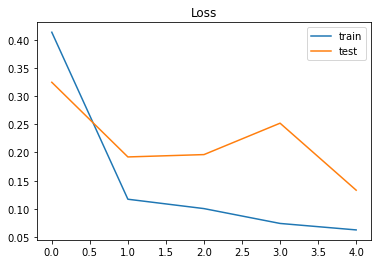

In [28]:
from matplotlib import pyplot

pyplot.title('Loss')
pyplot.plot(r.history['loss'], label='train')
pyplot.plot(r.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


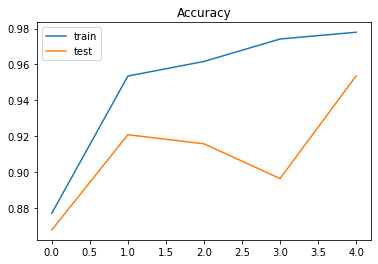

In [29]:

pyplot.title('Accuracy')
pyplot.plot(r.history['accuracy'], label='train')
pyplot.plot(r.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()